2023-05-19    1884.517305
2023-05-20    1884.287187
2023-05-21    1884.310988
2023-05-22    1884.502630
2023-05-23    1884.801665
2023-05-24    1885.168551
2023-05-25    1885.578097
2023-05-26    1886.014402
2023-05-27    1886.467460
2023-05-28    1886.930980
2023-05-29    1887.401005
2023-05-30    1887.875047
2023-05-31    1888.351541
2023-06-01    1888.829503
2023-06-02    1889.308314
2023-06-03    1889.787583
2023-06-04    1890.267067
2023-06-05    1890.746610
2023-06-06    1891.226117
2023-06-07    1891.705525
2023-06-08    1892.184798
2023-06-09    1892.663910
2023-06-10    1893.142847
2023-06-11    1893.621599
2023-06-12    1894.100161
2023-06-13    1894.578528
2023-06-14    1895.056698
2023-06-15    1895.534671
2023-06-16    1896.012444
2023-06-17    1896.490018
Freq: D, Name: Lần cuối, dtype: float64


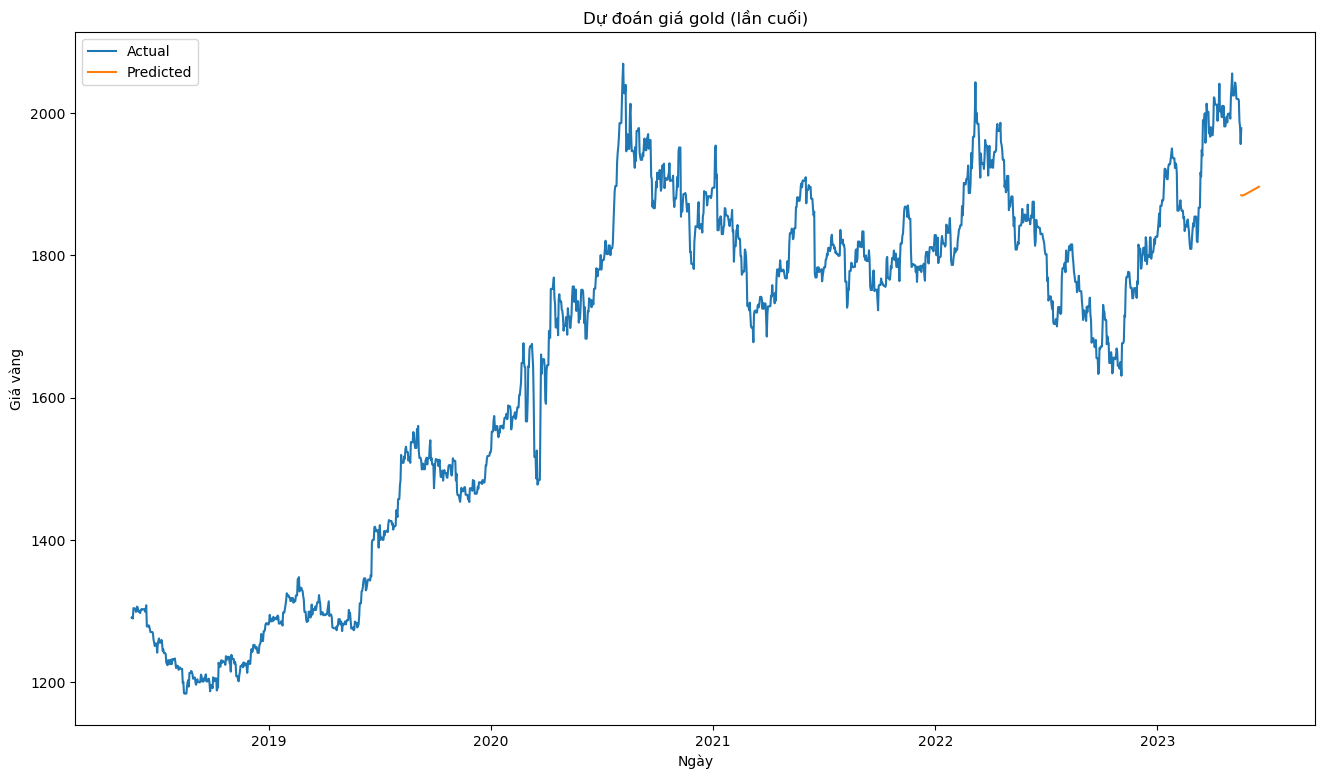

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data_gold = pd.read_csv("./data/GoldData.csv", na_values=['null'], index_col='Ngày', parse_dates=True, infer_datetime_format=True)
data_gold = data_gold.drop('KL', axis=1)
data_gold.dropna(inplace=True)

# Chuyển đổi thành tần suất hàng ngày
data_gold = data_gold.resample('D').ffill()

# Chia tập train-test-validate theo tỉ lệ 5:3:2
train_size = int(len(data_gold) * 0.5)
val_size = int(len(data_gold) * 0.2)  # 10% dữ liệu cho tập validate
test_size = len(data_gold) - train_size - val_size

train_data = data_gold[:train_size].copy()
val_data = data_gold[train_size:train_size+val_size].copy()
test_data = data_gold[train_size+val_size:].copy()

# Huấn luyện mô hình VAR trên tập train
model = VAR(train_data)
model_fit = model.fit()

# Dự đoán giá vàng trong 30 ngày tiếp theo
forecast = model_fit.forecast(model_fit.endog, steps=30)
last_date = data_gold.index[-1]
date_range = pd.date_range(start=last_date, periods=30, freq='D')
predictions = pd.DataFrame(forecast, index=date_range, columns=data_gold.columns)
predicted_gold_prices = predictions['Lần cuối']

# In kết quả dự đoán
print(predicted_gold_prices)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(16, 9))
plt.plot(data_gold.index, data_gold['Lần cuối'], label='Actual')
plt.plot(predicted_gold_prices.index, predicted_gold_prices, label='Predicted')
plt.title('Dự đoán giá gold (lần cuối)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()

## Đánh giá mô hình

In [2]:
# Tính toán các chỉ số đánh giá
actual_prices = test_data['Lần cuối']
mae = np.mean(np.abs(predicted_gold_prices - actual_prices))
rmse = np.sqrt(np.mean((predicted_gold_prices - actual_prices)**2))
mape = np.mean(np.abs((predicted_gold_prices - actual_prices) / actual_prices)) * 100

# In kết quả đánh giá
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 94.18269518160241
Root Mean Squared Error (RMSE): 94.18269518160241
Mean Absolute Percentage Error (MAPE): 4.759826915732673
